<div class = "page-header">
    <h1 class = "alert alert-info">
    Study of standard clustering techniques<br/>
    <small>
        Henrique Gasparini Fiuza do Nascimento - started: 04/02/2017<br/>
    </small>
    </h1> 
</div>

<div class="alert alert-success">
    <h2>
        Imports
    </h2>
</div>
<h4 class="alert alert-warning">Importing libraries and checking working directory</h4>

In [35]:
import pandas as pd
import numpy as np

# import libraries for visualization
%matplotlib inline
import matplotlib.pyplot as plt
import pylab

#import libraries for features decomposition
import sklearn as sk
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

#Visualization param
pd.options.display.max_columns = None
pd.options.display.max_rows = None

<h4 class="alert alert-warning">Actually importing the data</h4>

In [36]:
#import data
df = pd.read_csv('../../Data/NBA_per_minute_complete_with_postions.csv')
print "(rows,cols) =",df.shape
df.head(5)

(rows,cols) = (476, 28)


,Unnamed: 0,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,DD2,TD3,+/-,PosicNumber
0,0,31,69,36,33,1108,0.443141,0.169675,0.423285,40.1,0.059567,0.166968,35.7,0.044224,0.057762,76.6,0.018953,0.072202,0.091155,0.162455,0.074007,0.027076,0.009025,0.119134,0.000000,0.0,-0.009025,0
1,1,20,78,32,46,1863,0.385937,0.147075,0.310789,47.3,0.022544,0.076221,29.6,0.069243,0.103596,66.8,0.082662,0.189479,0.272142,0.068706,0.035427,0.031669,0.029522,0.082126,0.006441,0.0,-0.040794,1
2,2,21,21,15,6,93,0.193548,0.053763,0.204301,26.3,0.032258,0.107527,30.0,0.053763,0.129032,41.7,0.043011,0.118280,0.161290,0.021505,0.043011,0.064516,0.000000,0.107527,0.000000,0.0,-0.075269,2
3,3,25,52,18,34,486,0.271605,0.109053,0.298354,36.6,0.018519,0.065844,28.1,0.034979,0.053498,65.4,0.041152,0.187243,0.228395,0.059671,0.074074,0.032922,0.022634,0.158436,0.000000,0.0,-0.246914,1
4,4,30,82,48,34,2631,0.474724,0.201064,0.398328,50.5,0.033447,0.097301,34.4,0.039149,0.049031,79.8,0.056252,0.170277,0.226530,0.099962,0.040669,0.025846,0.045990,0.061954,0.006461,0.0,0.087799,4


<h4 class="alert alert-warning">Saving positions numbers</h4>

In [37]:
actual_positions = df['PosicNumber'].values
df = df.drop(['Unnamed: 0', 'PosicNumber'], 1)

In [38]:
df.head(5)

,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,DD2,TD3,+/-
0,31,69,36,33,1108,0.443141,0.169675,0.423285,40.1,0.059567,0.166968,35.7,0.044224,0.057762,76.6,0.018953,0.072202,0.091155,0.162455,0.074007,0.027076,0.009025,0.119134,0.000000,0.0,-0.009025
1,20,78,32,46,1863,0.385937,0.147075,0.310789,47.3,0.022544,0.076221,29.6,0.069243,0.103596,66.8,0.082662,0.189479,0.272142,0.068706,0.035427,0.031669,0.029522,0.082126,0.006441,0.0,-0.040794
2,21,21,15,6,93,0.193548,0.053763,0.204301,26.3,0.032258,0.107527,30.0,0.053763,0.129032,41.7,0.043011,0.118280,0.161290,0.021505,0.043011,0.064516,0.000000,0.107527,0.000000,0.0,-0.075269
3,25,52,18,34,486,0.271605,0.109053,0.298354,36.6,0.018519,0.065844,28.1,0.034979,0.053498,65.4,0.041152,0.187243,0.228395,0.059671,0.074074,0.032922,0.022634,0.158436,0.000000,0.0,-0.246914
4,30,82,48,34,2631,0.474724,0.201064,0.398328,50.5,0.033447,0.097301,34.4,0.039149,0.049031,79.8,0.056252,0.170277,0.226530,0.099962,0.040669,0.025846,0.045990,0.061954,0.006461,0.0,0.087799


<h4 class="alert alert-warning">Scaling data</h4>

In [39]:
cols = df.columns
df = sk.preprocessing.scale(df)
df = pd.DataFrame(df, columns=cols)

<div class="alert alert-success">
    <h2>
        Feature Selection
    </h2>
</div>
<h4 class="alert alert-warning">We remind the sets of selected features and build sub-dataframes for each of them</h4>

In [40]:
laplacian_score_features = [u'TD3', u'3PM', u'3P%', u'PTS', u'FGM', u'3PA', u'FG%']
spec_features = [u'+/-', u'PF', u'STL', u'AGE', u'BLK', u'OREB', u'TOV']
mcfs_features = [u'OREB', u'DREB', u'STL', u'3PA', u'PF', u'+/-', u'AGE']
papers_features = ['REB','AST','TOV','STL','BLK','PF','PTS']

In [41]:
laplacian_df = df[laplacian_score_features]
spec_df = df[spec_features]
mcfs_df = df[mcfs_features]
papers_df = df[papers_features]

<div class="alert alert-success">
    <h2>
        Clustering Analysis
    </h2>
</div>

<h4 class="alert alert-warning">1 - KMeans</h4>

In [42]:
from sklearn.cluster import KMeans
def getKMeansLabels(df):
    estimator = KMeans(n_clusters=5)
    estimator.fit(df)
    return estimator.labels_

In [47]:
labels_set = {}
labels_set['Laplacian - KMeans'] = getKMeansLabels(laplacian_df)
labels_set['SPEC - KMeans'] = getKMeansLabels(spec_df)
labels_set['MCFS - KMeans'] = getKMeansLabels(mcfs_df)
labels_set['Paper - KMeans'] = getKMeansLabels(papers_df)

<h4 class="alert alert-warning">1.1 - Compute scores</h4>

In [45]:
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import silhouette_score

In [53]:
print "Random Index scores:"
for k,v in labels_set.iteritems():
    print k, adjusted_rand_score(v, actual_positions)

Random Index scores:
SPEC - KMeans 0.00802981225864
Paper - KMeans 0.0106256045715
MCFS - KMeans 0.0174988186932
Laplacian - KMeans 0.00761106465405


In [56]:
print "Silhouette scores:"
for k, v in labels_set.iteritems():
    print k, silhouette_score(df, v)

Silhouette scores:
SPEC - KMeans 0.0531430638849
Paper - KMeans 0.102402988768
MCFS - KMeans 0.0684978948198
Laplacian - KMeans 0.0939830188223


<h4 class="alert alert-warning">2 - Agglomerative Clustering</h4>

In [ ]:
from sklearn.cluster import KMeans
def getKMeansLabels(df):
    estimator = KMeans(n_clusters=5)
    estimator.fit(df)
    return estimator.labels_

In [59]:
pca = sk.decomposition.PCA(n_components=10, whiten=True)
df_red = pca.fit_transform(df)

print pca.explained_variance_ratio_
print "variance sum =",sum(pca.explained_variance_ratio_)

[ 0.21715565  0.20894822  0.10227063  0.07640689  0.05252312  0.04947878
  0.04088595  0.03512781  0.03143335  0.02955904]
variance sum = 0.843789435218


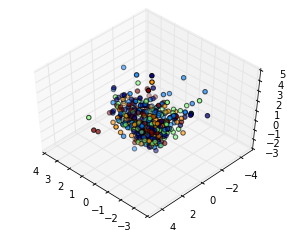

In [63]:
fig = plt.figure(1, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(df_red[:, 0], df_red[:, 1], df_red[:, 2], c=actual_positions)

In [61]:
import pandas as pd
import numpy as np
import os
print os.getcwd();

# import libraries for visualization
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pylab

#import libraries for features decomposition
import sklearn as sk
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

C:\Users\henrique\Desktop\Polytechnique\3rd year\Projet 3A\Shared Folder\TDA-NBA\notebooks\Clustering


In [66]:
statesN = [1,2,3,4,5]
states = [invdict[x] for x in statesN]
states

[' PG', ' PF', ' SG', ' SF', ' C']

In [65]:
dict = {' PG': 1, ' PF': 2, ' SG' : 3, ' SF' : 4, ' C' : 5}
invdict = {v: k for k, v in dict.iteritems()}

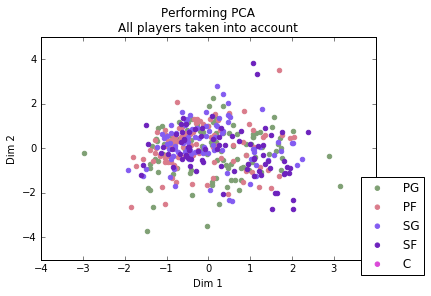

<Container object of 10 artists>

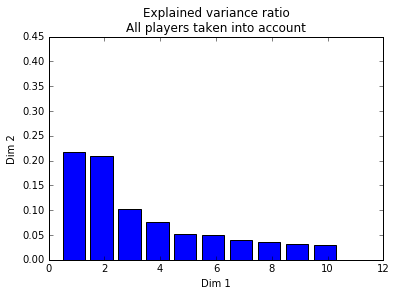

In [69]:
import matplotlib.patches as mpatches
pylab.title("Performing PCA\nAll players taken into account")
pylab.xlabel("Dim 1")
pylab.ylabel("Dim 2")
#pylab.scatter(df_red[:, 0], df_red[:, 1], c=position_labels)

states = [invdict[x] for x in [1,2,3,4,5]]
for i,l in enumerate(states):
    x = []
    y = []
    for j,_ in enumerate(df_red[:, 0]):
        if actual_positions[j] == i+1:
            x.append(df_red[j,0])
            y.append(df_red[j,1])
    pylab.scatter(x,y,label=l,color = np.random.rand(3,1) )

pylab.legend(loc='upper center', bbox_to_anchor=(1.05, .4) ,scatterpoints = 1)
pylab.show()


pylab.title("Explained variance ratio\nAll players taken into account") 
pylab.xlabel("Dim 1")
pylab.ylabel("Dim 2")
pylab.ylim(0,.45)
x_axis =[x+.5 for x in range(len(pca.explained_variance_ratio_))]
pylab.bar(x_axis,pca.explained_variance_ratio_)